# Sales totals

The dataset you'll be working with during this chapter is one year's sales data by month for three different industries. Each row in this monthly_sales array represents a month from January to December. The first column has monthly sales data for liquor stores, the second column has data for restaurants, and the last column tracks sales for department stores.
```
array([[ 4134, 23925,  8657],
       [ 4116, 23875,  9142],
       [ 4673, 27197, 10645],
       [ 4580, 25637, 10456],
       [ 5109, 27995, 11299],
       [ 5011, 27419, 10625],
       [ 5245, 27305, 10630],
       [ 5270, 27760, 11550],
       [ 4680, 24988,  9762],
       [ 4913, 25802, 10456],
       [ 5312, 25405, 13401],
       [ 6630, 27797, 18403]])
```

Your task is to create an array with all the information from `monthly_sales` as well as a fourth column which totals the monthly sales across industries for each month.

`numpy` is loaded for you as `np`, and the `monthly_sales` array is available.

In [2]:
import numpy as np
monthly_sales = np.load("dataset/monthly_sales.npy")

# Create a 2D array of total monthly sales across industries
monthly_industry_sales = monthly_sales.sum(axis = 1, keepdims = True)
print(monthly_industry_sales)

[[36716]
 [37133]
 [42515]
 [40673]
 [44403]
 [43055]
 [43180]
 [44580]
 [39430]
 [41171]
 [44118]
 [52830]]


In [4]:

# Add this column as the last column in monthly_sales
monthly_sales_with_total = np.concatenate((monthly_sales, monthly_industry_sales), axis=1)
print(monthly_sales_with_total)

[[ 4134 23925  8657 36716]
 [ 4116 23875  9142 37133]
 [ 4673 27197 10645 42515]
 [ 4580 25637 10456 40673]
 [ 5109 27995 11299 44403]
 [ 5011 27419 10625 43055]
 [ 5245 27305 10630 43180]
 [ 5270 27760 11550 44580]
 [ 4680 24988  9762 39430]
 [ 4913 25802 10456 41171]
 [ 5312 25405 13401 44118]
 [ 6630 27797 18403 52830]]


# Plotting averages

Perhaps you have a hunch that department stores see greater increased sales than average during the end of the year as people rush to buy gifts. You'd like to test this theory by comparing monthly department store sales to average sales across all three industries.
`monthly_sales` array is available. The `monthly_sales` columns in order refer to liquor store, restaurant, and department store sales.

In [5]:
# Create the 1D array avg_monthly_sales
avg_monthly_sales = monthly_sales.mean(axis=1)
print(avg_monthly_sales)

[12238.66666667 12377.66666667 14171.66666667 13557.66666667
 14801.         14351.66666667 14393.33333333 14860.
 13143.33333333 13723.66666667 14706.         17610.        ]


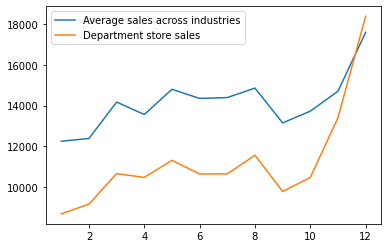

In [6]:
import matplotlib.pyplot as plt

# Plot avg_monthly_sales by month
plt.plot(np.arange(1,13), avg_monthly_sales, label="Average sales across industries")

# Plot department store sales by month
plt.plot(np.arange(1,13), monthly_sales[:,2] , label="Department store sales")
plt.legend()
plt.show()

# Cumulative sales

In the last exercise, you established that December is a big month for department stores. Are there other months where sales increase or decrease significantly?

Your task now is to look at monthly cumulative sales for each industry. The slope of the cumulative sales line will explain a lot about how steady sales are over time: a straight line will indicate steady growth, and changes in slope will indicate relative increases or decreases in sales.

In [7]:
# Find cumulative monthly sales for each industry
cumulative_monthly_industry_sales = monthly_sales.cumsum(axis=0)
print(cumulative_monthly_industry_sales)



[[  4134  23925   8657]
 [  8250  47800  17799]
 [ 12923  74997  28444]
 [ 17503 100634  38900]
 [ 22612 128629  50199]
 [ 27623 156048  60824]
 [ 32868 183353  71454]
 [ 38138 211113  83004]
 [ 42818 236101  92766]
 [ 47731 261903 103222]
 [ 53043 287308 116623]
 [ 59673 315105 135026]]


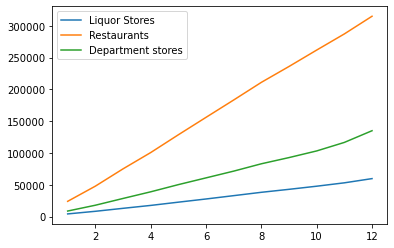

In [8]:
# Plot each industry's cumulative sales by month as separate lines
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,0], label="Liquor Stores")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,1], label="Restaurants")
plt.plot(np.arange(1, 13), cumulative_monthly_industry_sales[:,2], label="Department stores")
plt.legend()
plt.show()

# Tax calculations

It's possible to use vectorized operations to calculate taxes for the liquor, restaurant, and department store industries! We'll simplify the tax calculation process here and assume that government collects 5% of all sales across these industries as tax revenue.

Your task is to calculate the tax owed by each industry related to each month's sale

In [9]:
# Create an array of tax collected by industry and month
tax_collected = monthly_sales * 0.05
print(tax_collected)


[[ 206.7  1196.25  432.85]
 [ 205.8  1193.75  457.1 ]
 [ 233.65 1359.85  532.25]
 [ 229.   1281.85  522.8 ]
 [ 255.45 1399.75  564.95]
 [ 250.55 1370.95  531.25]
 [ 262.25 1365.25  531.5 ]
 [ 263.5  1388.    577.5 ]
 [ 234.   1249.4   488.1 ]
 [ 245.65 1290.1   522.8 ]
 [ 265.6  1270.25  670.05]
 [ 331.5  1389.85  920.15]]


In [10]:

# Create an array of sales revenue plus tax collected by industry and month
total_tax_and_revenue = tax_collected + monthly_sales
print(total_tax_and_revenue)

[[ 4340.7  25121.25  9089.85]
 [ 4321.8  25068.75  9599.1 ]
 [ 4906.65 28556.85 11177.25]
 [ 4809.   26918.85 10978.8 ]
 [ 5364.45 29394.75 11863.95]
 [ 5261.55 28789.95 11156.25]
 [ 5507.25 28670.25 11161.5 ]
 [ 5533.5  29148.   12127.5 ]
 [ 4914.   26237.4  10250.1 ]
 [ 5158.65 27092.1  10978.8 ]
 [ 5577.6  26675.25 14071.05]
 [ 6961.5  29186.85 19323.15]]


# Projecting sales

You'd like to be able to plan for next year's operations by projecting what sales will be, and you've gathered multipliers specific to each month and industry. These multipliers are saved in an array called `monthly_industry_multipliers`. For example, the multiplier at `monthly_industry_multipliers[0, 0]` of 0.98 means that the liquor store industry is projected to have 98% of this January's sales in January of next year.
```
array([[0.98, 1.02, 1.  ],
       [1.00, 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])
```
numpy is loaded for you as np, and the monthly_sales and `monthly_industry_multipliers` arrays are available. The `monthly_sales` columns in order refer to liquor store, restaurant, and department store sales.

In [11]:
monthly_industry_multipliers = np.array([[0.98, 1.02, 1.  ],
       [1.00, 1.01, 0.97],
       [1.06, 1.03, 0.98],
       [1.08, 1.01, 0.98],
       [1.08, 0.98, 0.98],
       [1.1 , 0.99, 0.99],
       [1.12, 1.01, 1.  ],
       [1.1 , 1.02, 1.  ],
       [1.11, 1.01, 1.01],
       [1.08, 0.99, 0.97],
       [1.09, 1.  , 1.02],
       [1.13, 1.03, 1.02]])

# Create an array of monthly projected sales for all industries
projected_monthly_sales = monthly_sales * monthly_industry_multipliers
print(projected_monthly_sales)


[[ 4051.32 24403.5   8657.  ]
 [ 4116.   24113.75  8867.74]
 [ 4953.38 28012.91 10432.1 ]
 [ 4946.4  25893.37 10246.88]
 [ 5517.72 27435.1  11073.02]
 [ 5512.1  27144.81 10518.75]
 [ 5874.4  27578.05 10630.  ]
 [ 5797.   28315.2  11550.  ]
 [ 5194.8  25237.88  9859.62]
 [ 5306.04 25543.98 10142.32]
 [ 5790.08 25405.   13669.02]
 [ 7491.9  28630.91 18771.06]]


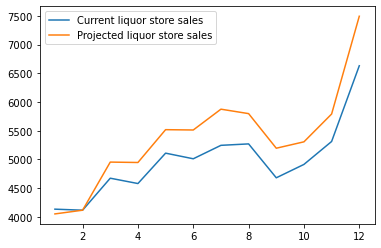

In [12]:

# Graph current liquor store sales and projected liquor store sales by month
plt.plot(np.arange(1,13), monthly_sales[:,0], label="Current liquor store sales")
plt.plot(np.arange(1,13), projected_monthly_sales[:,0], label="Projected liquor store sales")
plt.legend()
plt.show()

# Vectorizing .upper()

There are many situations where you might want to use Python methods and functions on array elements in NumPy. You can always write a for loop to do this, but vectorized operations are much faster and more efficient, so consider using `np.vectorize()`!

You've got an array called names which contains first and last names:
```
names = np.array([["Izzy", "Monica", "Marvin"],
                  ["Weber", "Patel", "Hernandez"]])
```

You'd like to use one of the Python methods you learned on DataCamp, `.upper()`, to make all the letters of every name in the array uppercase. As a reminder, `.upper()` is a string method, meaning that it must be called on an instance of a string: `str.upper()`.

Your task is to vectorize this Python method. numpy is loaded for you as `np`, and the names array is available.

In [13]:
names = np.array([["Izzy", "Monica", "Marvin"],
                  ["Weber", "Patel", "Hernandez"]])

# Vectorize the .upper() string method
vectorized_upper = np.vectorize(str.upper)

# Apply vectorized_upper to the names array
uppercase_names = vectorized_upper(names)
print(uppercase_names)

[['IZZY' 'MONICA' 'MARVIN']
 ['WEBER' 'PATEL' 'HERNANDEZ']]


# Broadcastable or not?

Broadcasting takes the power of vectorized operations in NumPy one step further, saving memory and computing power. But before broadcasting, you'll need to check whether it's even possible to use broadcasting in your mathematical operations!

<center><img src="images/03.05.png"  style="width: 400px, height: 300px;"/></center>


# Broadcasting across columns

Recall that when broadcasting across columns, NumPy requires you to be explicit that it should broadcast a vertical array, and horizontal and vertical 1D arrays do not exist in NumPy. Instead, you must first create a 2D array to declare that you have vertical data. Then, NumPy creates a copy of this 2D vertical array for each column and applies the desired operation.

A Python list called `monthly_growth_rate` with `len()` of 12 is available. This list represents monthly year-over-year expected growth for the economy; your task is to use broadcasting to multiply this list by each column in the `monthly_sales` array. The `monthly_sales` array is loaded,

In [15]:
monthly_growth_rate = [1.01, 1.03, 1.03, 1.02, 1.05, 1.03, 1.06, 1.04, 1.03, 1.04, 1.02, 1.01]

# Convert monthly_growth_rate into a NumPy array
monthly_growth_1D = np.array(monthly_growth_rate)

# Reshape monthly_growth_1D
monthly_growth_2D = monthly_growth_1D.reshape(len(monthly_growth_rate),1)

# Multiply each column in monthly_sales by monthly_growth_2D
print(monthly_sales * monthly_growth_2D)

[[ 4175.34 24164.25  8743.57]
 [ 4239.48 24591.25  9416.26]
 [ 4813.19 28012.91 10964.35]
 [ 4671.6  26149.74 10665.12]
 [ 5364.45 29394.75 11863.95]
 [ 5161.33 28241.57 10943.75]
 [ 5559.7  28943.3  11267.8 ]
 [ 5480.8  28870.4  12012.  ]
 [ 4820.4  25737.64 10054.86]
 [ 5109.52 26834.08 10874.24]
 [ 5418.24 25913.1  13669.02]
 [ 6696.3  28074.97 18587.03]]


# Broadcasting across rows

In the last set of exercises, you used `monthly_industry_multipliers`. Assume you're not comfortable being so specific with your estimates. Rather, you'd like to use `monthly_industry_multipliers` to find a single average multiplier for each industry. Then you'll use that multiplier to project next year's sales.

numpy is loaded for you as np, and the `monthly_sales` and `monthly_industry_multipliers` arrays are available. The `monthly_sales` columns in order refer to liquor store, restaurant, and department store sales.

In [17]:
# Find the mean sales projection multiplier for each industry
mean_multipliers = monthly_industry_multipliers.mean(axis=0)
print(mean_multipliers)

# Print the shapes of mean_multipliers and monthly_sales
print(mean_multipliers.shape, monthly_sales.shape)

# Multiply each value by the multiplier for that industry
projected_sales = mean_multipliers * monthly_sales
print(projected_sales)

[1.0775     1.00833333 0.99333333]
(3,) (12, 3)
[[ 4454.385      24124.375       8599.28666667]
 [ 4434.99       24073.95833333  9081.05333333]
 [ 5035.1575     27423.64166667 10574.03333333]
 [ 4934.95       25850.64166667 10386.29333333]
 [ 5504.9475     28228.29166667 11223.67333333]
 [ 5399.3525     27647.49166667 10554.16666667]
 [ 5651.4875     27532.54166667 10559.13333333]
 [ 5678.425      27991.33333333 11473.        ]
 [ 5042.7        25196.23333333  9696.92      ]
 [ 5293.7575     26017.01666667 10386.29333333]
 [ 5723.68       25616.70833333 13311.66      ]
 [ 7143.825      28028.64166667 18280.31333333]]
